# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [199]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [200]:
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

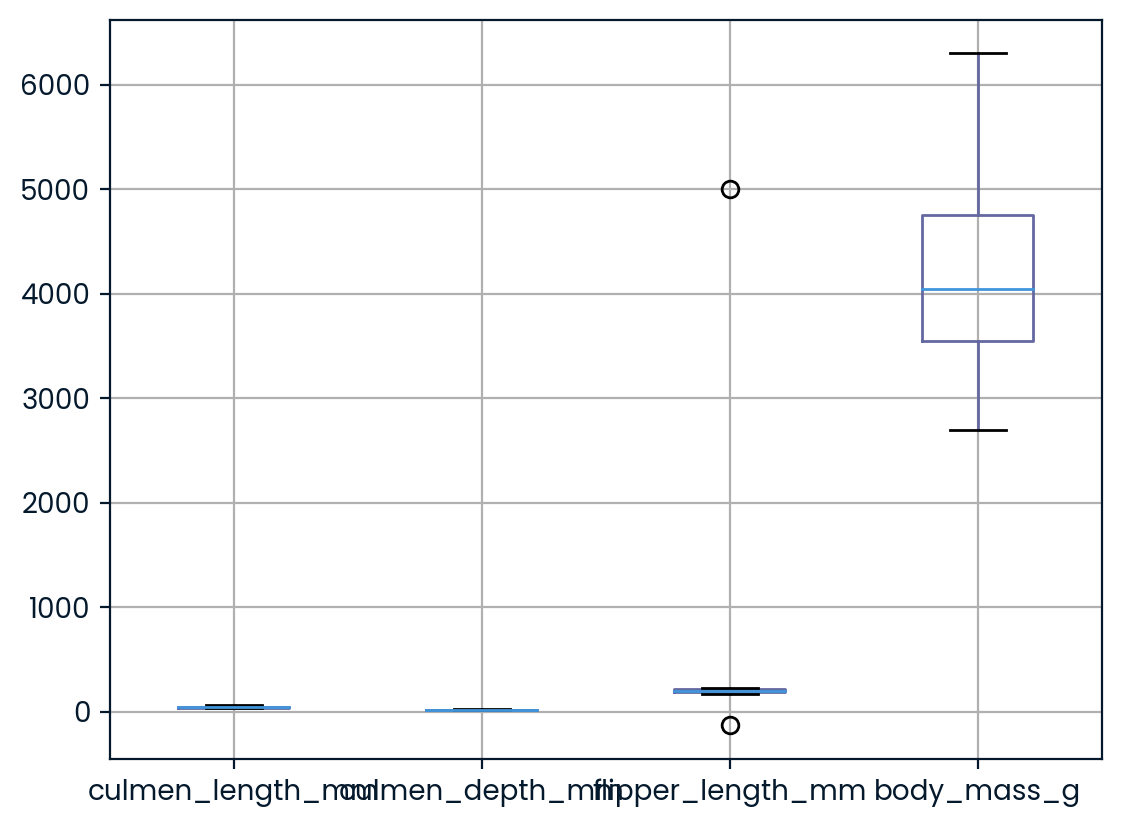

In [201]:
penguins_df.boxplot()
plt.show()

In [202]:
penguins_clean = penguins_df.dropna()
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean = penguins_clean.drop([9,14])
penguins_clean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [203]:
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,0


In [204]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
...,...,...,...,...,...,...
328,0.584511,-1.763116,0.925454,0.890339,1.009050,-1.003008
329,0.510929,-1.456367,0.996775,0.797145,1.009050,-1.003008
330,1.173166,-0.740619,1.496019,1.915480,-0.991031,0.997001
331,0.216602,-1.200743,0.782813,1.232053,1.009050,-1.003008


In [205]:
pca = PCA()
pca.fit(penguins_preprocessed)
n_components = (pca.explained_variance_ratio_ > 0.1).sum()

n_components

2

In [206]:
pca = PCA(n_components = n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)


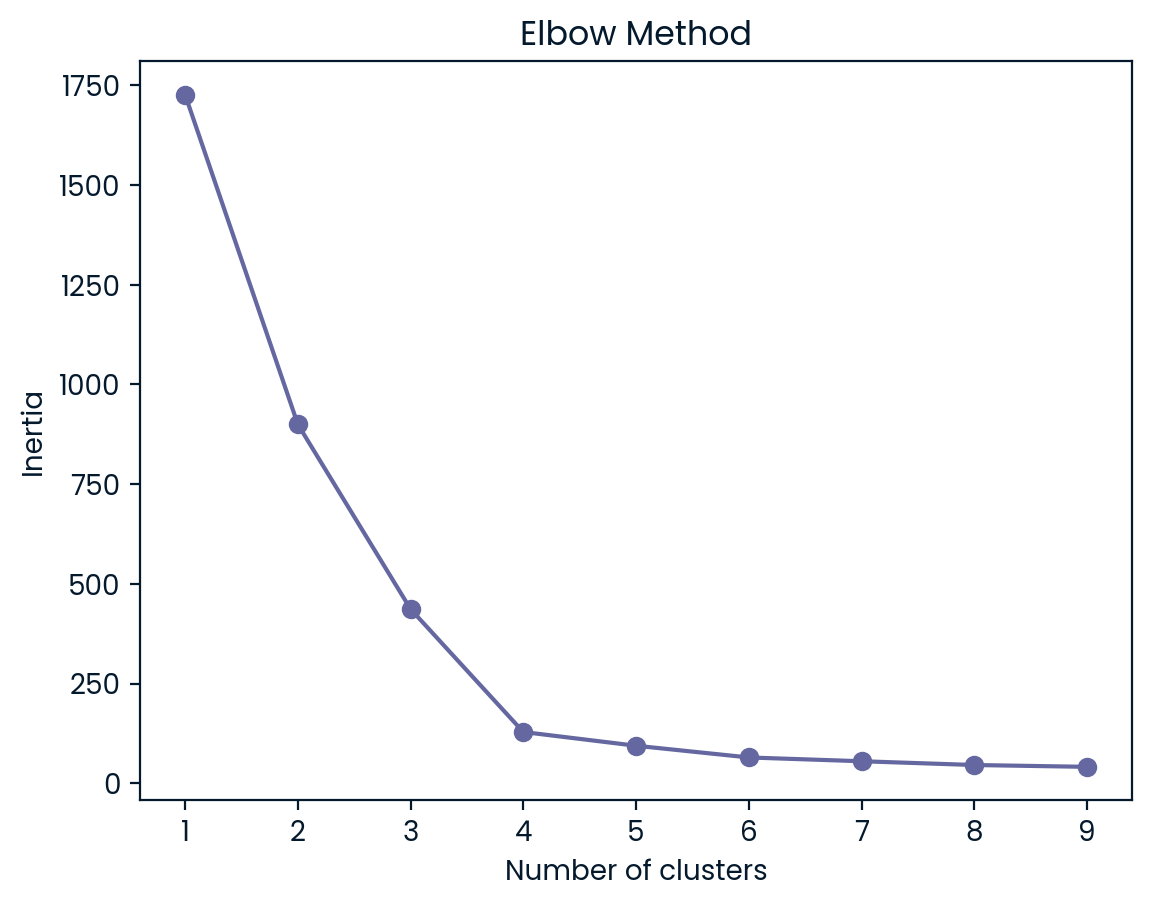

In [207]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
    
    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

In [208]:
n_clusters = 4

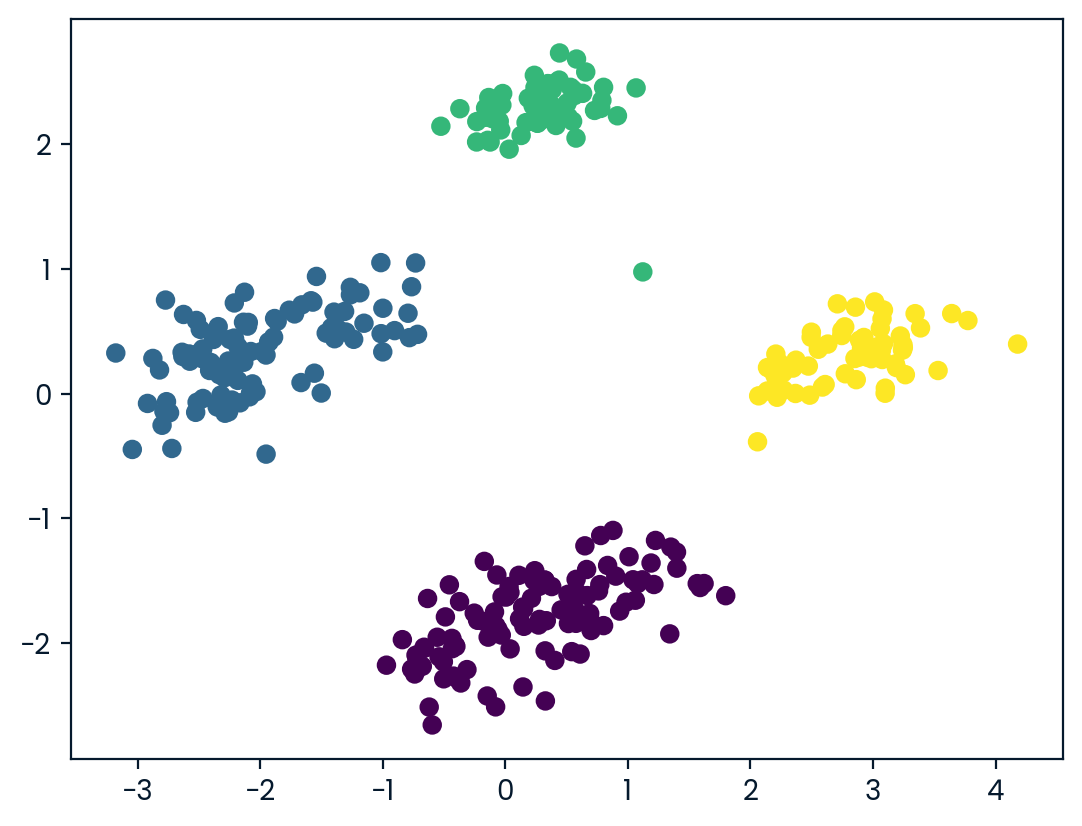

In [209]:
kmeans=KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_)

In [210]:
penguins_clean['label'] = kmeans.labels_
numeric_columns = penguins_clean.select_dtypes(include=['number']).columns.tolist()
stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()

In [211]:
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,label
label,,,,,
0,43.878302,19.111321,194.764151,4006.603774,0.0
1,40.217757,17.611215,189.046729,3419.158879,1.0
2,45.545763,14.262712,212.779661,4683.050847,2.0
3,49.473770,15.718033,221.540984,5484.836066,3.0
